# Introduction

The dataset contains booking information for City Hotel and Resort Hotel in 2022, including the number of bookings and cancellations, monthly booking volumes, sources of guests and cancellation rates, customer types, booking channels, average daily expenses for different types of travelers, the number of new and returning guests along with cancellation rates, deposit methods and their impact on cancellation rates, room types and booking cancellation volumes, and other related information

### Skills

Random Forest, XGBoost, Logistic Regression

# 1 Explore Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('Data/2022_hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Check the proportion of missing values
df.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,99%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.0,0.0,0.0,0.00,0.000,1.0,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,0.0,0.0,3.0,18.00,69.000,160.0,444.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2015.0,2015.0,2015.0,2016.00,2016.000,2017.0,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,2.0,5.0,8.0,16.00,28.000,38.0,53.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,1.0,2.0,4.0,8.00,16.000,23.0,31.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.0,0.0,0.0,0.00,1.000,2.0,4.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,0.0,0.0,1.0,1.00,2.000,3.0,10.00,50.0
adults,119390.0,1.856403,0.579261,0.00,1.0,1.0,1.0,2.00,2.000,2.0,3.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.0,0.0,0.0,0.00,0.000,0.0,2.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.0,0.0,0.0,0.00,0.000,0.0,0.00,10.0


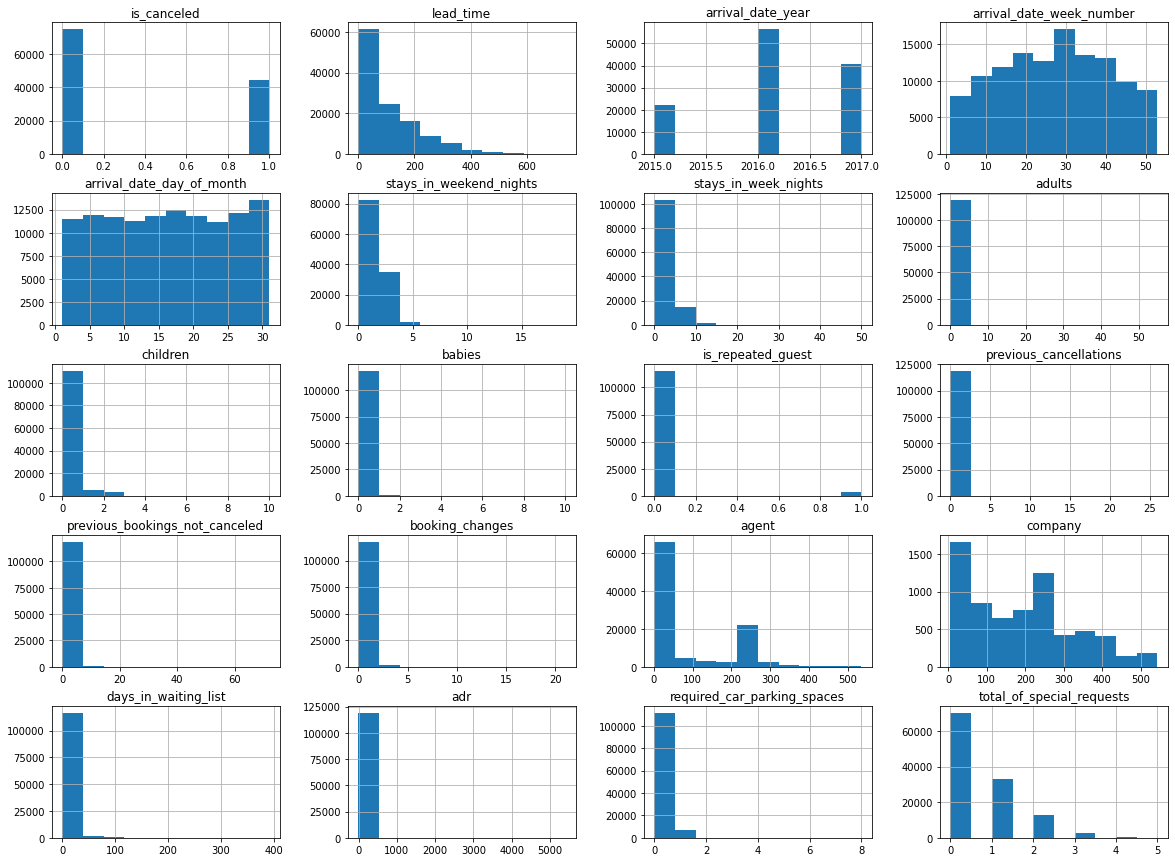

In [7]:
df.hist(figsize=(20,15))
plt.show()

# 3 Data Preprocessing

The purpose of modeling is to predict whether a traveler will cancel their hotel reservation. Subsequently, the 'is_canceled' column will be set as the target label y, while the remaining columns will serve as features x.

## 3.1 Handle categorical variables

In [24]:
cate = df1.columns[df1.dtypes == "object"].tolist()
# Categorical variables represented by numbers
num_cate = ['agent','company','is_repeated_guest']
cate = cate + num_cate

In [25]:
results={}
for i in ['agent','company']:
    result = np.sort(df1[i].unique())
    results[i]=result
results

{'agent': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
         35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,  45.,  47.,
         50.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
         63.,  64.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
         75.,  77.,  78.,  79.,  81.,  82.,  83.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 103.,
        104., 105., 106., 107., 110., 111., 112., 114., 115., 117., 118.,
        119., 121., 122., 126., 127., 128., 129., 132., 133., 134., 135.,
        138., 139., 141., 142., 143., 144., 146., 147., 148., 149., 150.,
        151., 152., 153., 154., 155., 156., 157., 158., 159., 162., 163.,
        165., 167., 168., 170., 171., 173., 174., 175., 177., 179., 180.,
        181., 182., 183., 184

In [26]:
# The 'agent' and 'company' columns have a high proportion of missing values and no 0 values, 
# so they will be filled with 0
df1[['agent','company']]=df1[['agent','company']].fillna(0,axis=0)

In [27]:
df1.loc[:,cate].isnull().mean()

hotel                   0.000000
arrival_date_month      0.000000
meal                    0.000000
country                 0.004087
market_segment          0.000000
distribution_channel    0.000000
reserved_room_type      0.000000
assigned_room_type      0.000000
deposit_type            0.000000
customer_type           0.000000
reservation_status      0.000000
agent                   0.000000
company                 0.000000
is_repeated_guest       0.000000
dtype: float64

In [28]:
# Create new variables 'in_company' and 'in_agent' to classify travelers. 
# Set 'NO' for those with company and agent values of 0, and 'YES' for non-zero values
df1.loc[df1['company'] == 0,'in_company'] = 'NO'
df1.loc[df1['company'] != 0,'in_company'] = 'YES'
df1.loc[df1['agent'] == 0,'in_agent'] = 'NO'
df1.loc[df1['agent'] != 0,'in_agent'] = 'YES'

In [29]:
# "Create a new feature 'same_assignment'. 
# If the reserved room type matches the assigned room type, set it to 'YES', 
# otherwise set it to 'NO'
df1.loc[df1['reserved_room_type'] == df1['assigned_room_type'],'same_assignment'] = 'Yes'
df1.loc[df1['reserved_room_type'] != df1['assigned_room_type'],'same_assignment'] = 'NO'

In [30]:
# Delete the features 'reserved_room_type', 'assigned_room_type', 'agent', and 'company'
df1 = df1.drop(labels=['reserved_room_type','assigned_room_type','agent','company'],axis=1)

In [31]:
# Reassign the 'is_repeated_guest' feature. 
# Label repeat guests as 'YES' and non-repeat guests as 'NO'
df1['is_repeated_guest'][df1['is_repeated_guest']==0]='NO'
df1['is_repeated_guest'][df1['is_repeated_guest']==1]='YES'

In [32]:
df1['country']=df1['country'].fillna(df1['country'].mode()[0])

In [33]:
for i in ['in_company','in_agent','same_assignment']:
    cate.append(i)

for i in ['reserved_room_type','assigned_room_type','agent','company']:
    cate.remove(i)
cate

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'is_repeated_guest',
 'in_company',
 'in_agent',
 'same_assignment']

In [34]:
# Encode categorical features
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe = oe.fit(df1.loc[:,cate])
df1.loc[:,cate] = oe.transform(df1.loc[:,cate])

## 3.2 Handle continuous variables

In [35]:
# Select continuous variables
col = df1.columns.tolist()
col.remove('is_canceled')
for i in cate:
    col.remove(i)
col

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [36]:
df1[col].isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [37]:
# Fill the missing values in the 'children' column of xtrain using the mode.
df1['children']=df1['children'].fillna(df1['children'].mode()[0])

In [38]:
# Perform feature scaling on continuous variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(df1.loc[:,col])
df1.loc[:,col] = ss.transform(df1.loc[:,col])

## 3.3 Correlation coefficients of each variable

In [39]:
cor = df1.corr()
cor = abs(cor['is_canceled']).sort_values()
cor

arrival_date_month                0.001491
stays_in_weekend_nights           0.001791
children                          0.005036
arrival_date_day_of_month         0.006130
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
meal                              0.017678
stays_in_week_nights              0.024765
babies                            0.032491
adr                               0.047557
days_in_waiting_list              0.054186
previous_bookings_not_canceled    0.057358
market_segment                    0.059338
adults                            0.060017
customer_type                     0.068140
is_repeated_guest                 0.084793
in_company                        0.099310
in_agent                          0.102068
previous_cancellations            0.110133
hotel                             0.136531
booking_changes                   0.144381
distribution_channel              0.167600
required_car_parking_spaces       0.195498
total_of_sp

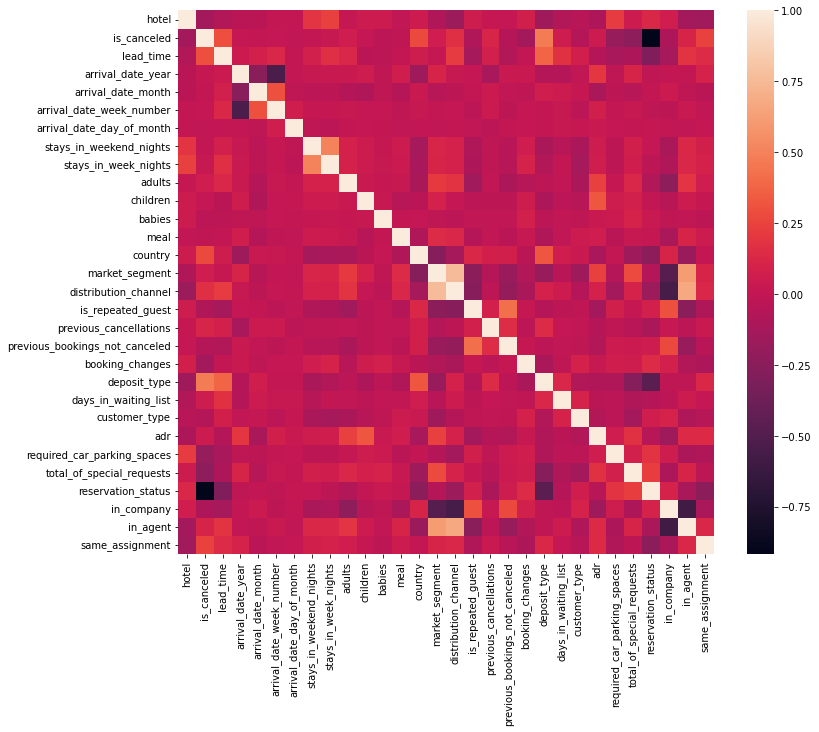

In [40]:
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr)
plt.show()

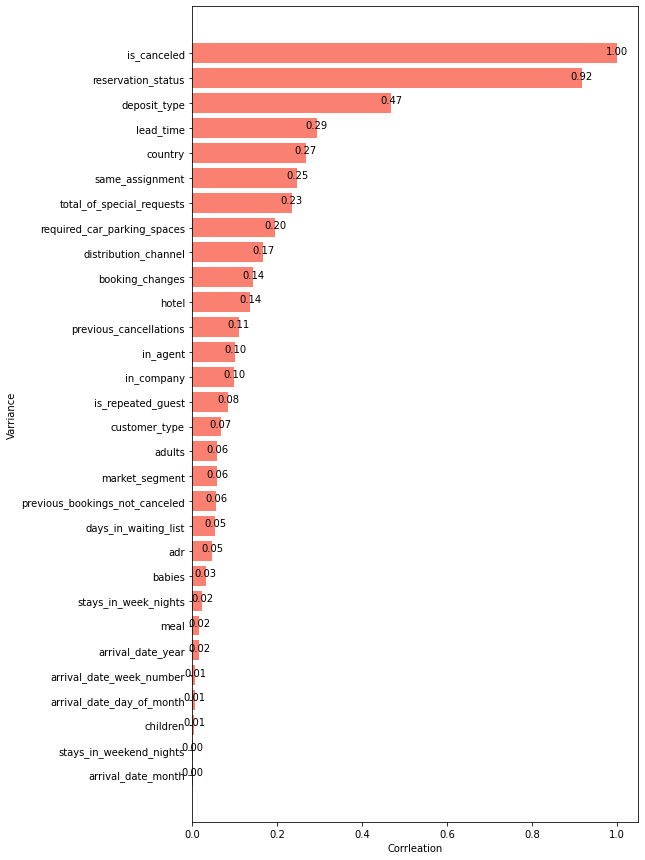

In [41]:
plt.figure(figsize=(8,15))
x = range(len(cor.index))
name = cor.index
y = abs(cor.values)
plt.barh(x,y,color='salmon')
plt.yticks(x,name)
for x,y in zip(x,y):
    plt.text(y,x-0.1,'%.2f' % y,ha='center',va='bottom')
plt.xlabel('Corrleation')
plt.ylabel('Varriance')
plt.show()

In [42]:
df2 = df1.drop('reservation_status',axis=1)

# 4 Model Prediction

In [43]:
# Split features (x) and label (y)
x = df2.loc[:,df2.columns != 'is_canceled']
y = df2.loc[:,'is_canceled']
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=90)
for i in [xtrain,xtest,ytrain,ytest]:
    i.index=range(i.shape[0])

## 4.1 Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs,KFold
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
cv = KFold(n_splits=10,shuffle=True,random_state=90)
rfc_score = cvs(rfc,xtrain,ytrain,cv=cv).mean()
rfc.fit(xtrain,ytrain)
y_score = rfc.predict_proba(xtest)[:,1]
rfc_pred = rfc.predict(xtest)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
FPR,recall,thresholds = roc_curve(ytest,y_score,pos_label=1)
rfc_auc = AUC(ytest,y_score)

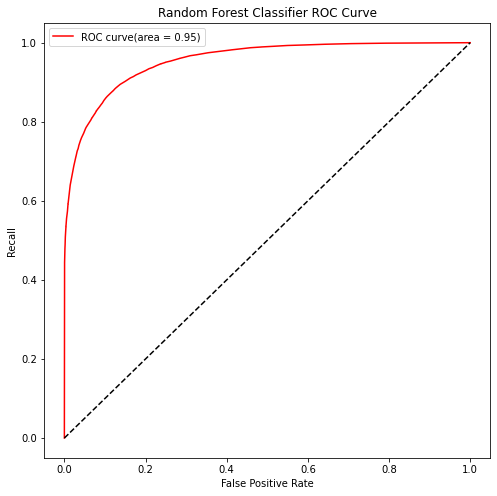

In [45]:
# Draw ROC curve
plt.figure(figsize=(8,8))
plt.plot(FPR, recall, color='red', label='ROC curve(area = %0.2f)' % rfc_auc)
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Random Forest Classifier ROC Curve')
plt.legend()
plt.show()

## 4.2 XGBoost

In [46]:
from xgboost import XGBClassifier
xgbr = XGBClassifier(n_estimators=100,random_state=90)
xgbr_score = cvs(xgbr,xtrain,ytrain,cv=cv).mean()
xgbr.fit(xtrain,ytrain)
y_score = xgbr.predict_proba(xtest)[:,1]
xgbr_pred = xgbr.predict(xtest)
FPR,recall,thresholds = roc_curve(ytest,y_score,pos_label=1)
xgbr_auc = AUC(ytest,y_score)

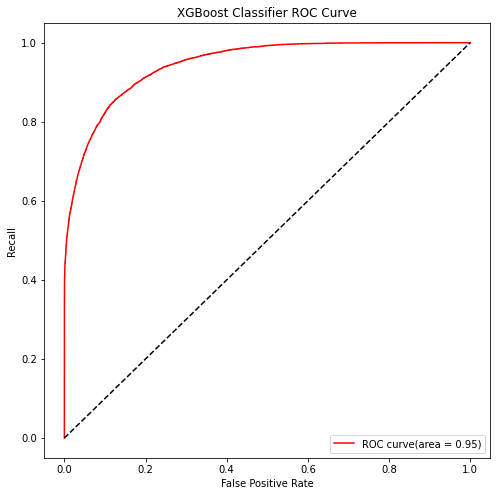

In [47]:
plt.figure(figsize=(8,8))
plt.plot(FPR, recall, color='red', label='ROC curve(area = %0.2f)' % xgbr_auc)
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('XGBoost Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 4.3 Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(penalty='l2',solver='liblinear',max_iter=1000)
lr_score = cvs(lr,xtrain,ytrain,cv=cv).mean()
lr.fit(xtrain,ytrain)
y_score = lr.predict_proba(xtest)[:,1]
lr_pred = lr.predict(xtest)
FPR,recall,thresholds = roc_curve(ytest,y_score,pos_label=1)
lr_auc = AUC(ytest,y_score)

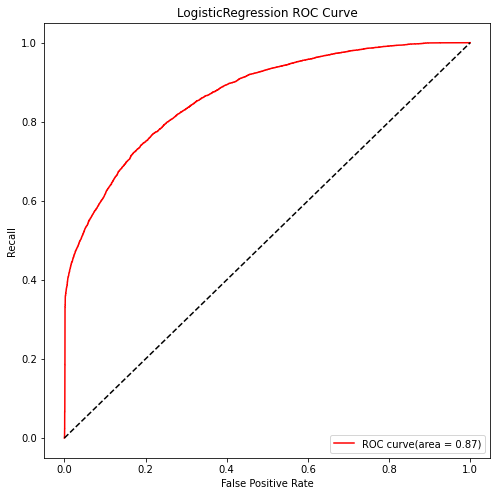

In [49]:
plt.figure(figsize=(8,8))
plt.plot(FPR, recall, color='red', label='ROC curve(area = %0.2f)' % lr_auc)
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('LogisticRegression ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 4.5 Conclusion

In [51]:
score = {'Model_score':[rfc_score,xgbr_score,lr_score],'AUC_area':[rfc_auc,xgbr_auc,lr_auc]}
score_com = pd.DataFrame(data=score,index=['RandomForest','XGBoost','LogisticRegression'])
score_com.sort_values(by=['Model_score'],ascending=False)

,Model_score,AUC_area
RandomForest,0.887894,0.954030
XGBoost,0.873261,0.945595
LogisticRegression,0.796035,0.866906


Random Forest and XGBoost performed the best on this dataset. The accuracy of Random Forest reached 88.9%, and the AUC score was 0.95.